In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  # データ可視化のための基本的なグラフ描画ライブラリ
import seaborn as sns  # 高機能な統計グラフを描画するライブラリ
from sklearn.preprocessing import LabelEncoder  # カテゴリ変数を数値に変換するエンコーダ
from sklearn.model_selection import StratifiedKFold  # 層化K分割交差検証を行うクラス
from sklearn.metrics import roc_auc_score  # ROC AUCスコアを計算する評価指標

In [3]:
df = pd.read_csv('data.csv')  # データセットの読み込み
df.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RemoteWork,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,...,1,5224,4,1,0,0,0,0,1,2023
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,...,3,6863,2,4,1,0,0,1,1,2023
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,...,2,7612,3,2,1,0,0,0,1,2023
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,...,2,11245,1,4,1,1,1,1,1,2023
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,...,2,3029,3,2,0,0,0,0,3,2023


In [4]:
# 1. カテゴリ変数を特定
# データ型が 'object' のカラムをカテゴリ変数として選択します。
categorical_cols = df.select_dtypes(include=['object']).columns

print("ダミー変数化の対象となるカテゴリ変数:")
print(categorical_cols)
print("="*50)

# 2. ダミー変数化を実行
# pd.get_dummies() を使って、カテゴリ変数を0と1の数値に変換します。
# drop_first=True は、多重共線性を防ぐための一般的な手法です。
# 例えば、'Gender'カラムから'Gender_Male'だけを作成すれば、
# この値が1なら男性、0なら女性と判断できるため、'Gender_Female'は不要になります。
df_dummy = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 3. 結果の確認
print("\nダミー変数化後のデータフレーム情報:")
df_dummy.info()

print("\nダミー変数化後のデータフレーム（先頭5行）:")
df_dummy.head()

ダミー変数化の対象となるカテゴリ変数:
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'HowToEmploy'],
      dtype='object')

ダミー変数化後のデータフレーム情報:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 61 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DistanceFromHome                   1470 non-null   int64
 2   Education                          1470 non-null   int64
 3   EmployeeCount                      1470 non-null   int64
 4   EmployeeNumber                     1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   PerformanceIndex                   1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   Job

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,PerformanceIndex,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,HowToEmploy_agent_A,HowToEmploy_agent_B,HowToEmploy_agent_C,HowToEmploy_direct_recruiting,HowToEmploy_intern
0,41,1,2,1,1,2,94,3,2,4,...,False,True,False,False,True,False,True,False,False,False
1,49,8,1,1,2,3,61,2,2,2,...,True,False,False,True,False,False,False,False,False,True
2,37,2,2,1,4,4,92,2,1,3,...,False,False,False,False,True,False,False,False,False,True
3,33,3,4,1,5,4,56,3,1,3,...,True,False,False,True,False,False,False,False,False,True
4,27,2,1,1,7,1,40,3,1,2,...,False,False,False,True,False,False,False,True,False,False


In [8]:
X = df_dummy.drop('Attrition_Yes', axis=1)  # 特徴量
y = df_dummy['Attrition_Yes']  # 目的変数
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 4. 層化K分割交差検証の設定
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)        



--- Evaluating CatBoost ---
  Fold 1: ROC AUC = 0.8546
  Fold 2: ROC AUC = 0.7869
  Fold 3: ROC AUC = 0.8681
  Fold 4: ROC AUC = 0.8089
  Fold 5: ROC AUC = 0.7441
-> Average ROC AUC for CatBoost: 0.8125

--- Evaluating LightGBM ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 157, number of negative: 783
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 940, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167021 -> initscore=-1.606887
[LightGBM] [Info] Start training from score -1.606887
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
  Fold 1: ROC AUC = 0.8193
[LightGBM] [Warning] Found whitesp

c:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:58:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Fold 1: ROC AUC = 0.8256


c:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:58:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Fold 2: ROC AUC = 0.7571


c:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:58:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Fold 3: ROC AUC = 0.8579


c:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:58:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Fold 4: ROC AUC = 0.8535


c:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:58:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Fold 5: ROC AUC = 0.7550
-> Average ROC AUC for XGBoost: 0.8098



C:\Users\user\AppData\Local\Temp\ipykernel_13400\1642531114.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ROC_AUC_Score', y='Model', data=results_df, palette='viridis')


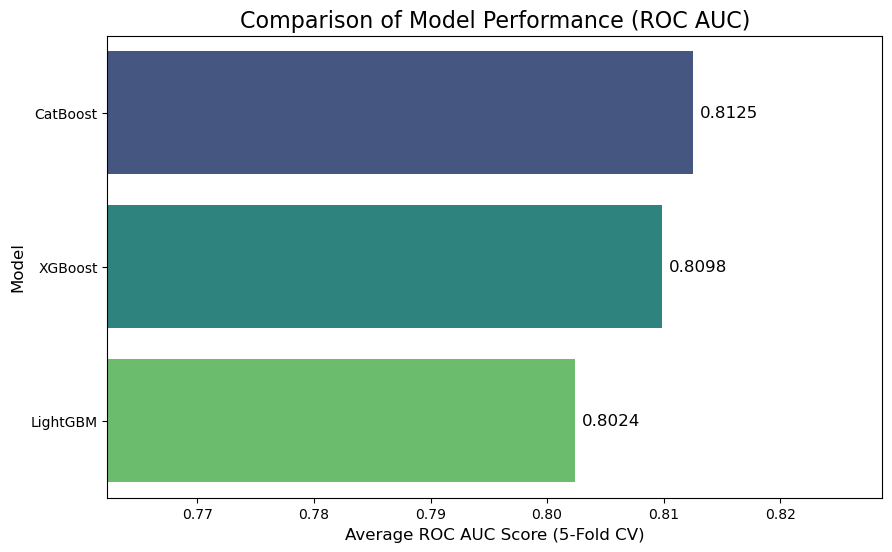


🏆 The best performing model is: CatBoost with an average ROC AUC score of 0.8125


In [10]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier 
from sklearn.metrics import roc_auc_score
import numpy as np

# 1. モデルの定義
# 各モデルをデフォルトのパラメータで初期化します
models = {
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 2. 交差検証による評価
results = {}
for name, model in models.items():
    print(f"--- Evaluating {name} ---")
    
    fold_scores = []
    # 層化K分割交差検証を実行
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
        # 訓練データと検証データに分割
        X_train_fold, y_train_fold = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_val_fold, y_val_fold = X_train.iloc[val_idx], y_train.iloc[val_idx]
        
        # モデルの学習
        model.fit(X_train_fold, y_train_fold)
        
        # 検証データで予測（確率）
        y_pred_proba = model.predict_proba(X_val_fold)[:, 1]
        
        # ROC AUCスコアを計算
        score = roc_auc_score(y_val_fold, y_pred_proba)
        fold_scores.append(score)
        print(f"  Fold {fold+1}: ROC AUC = {score:.4f}")
    
    # 平均スコアを保存
    mean_score = np.mean(fold_scores)
    results[name] = mean_score
    print(f"-> Average ROC AUC for {name}: {mean_score:.4f}\n")

# 3. 結果の可視化
# 結果をDataFrameに変換して、スコアの高い順に並び替え
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'ROC_AUC_Score']).sort_values('ROC_AUC_Score', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='ROC_AUC_Score', y='Model', data=results_df, palette='viridis')

# グラフの装飾
ax.set_title('Comparison of Model Performance (ROC AUC)', fontsize=16)
ax.set_xlabel('Average ROC AUC Score (5-Fold CV)', fontsize=12)
ax.set_ylabel('Model', fontsize=12)
ax.set_xlim(min(results.values()) * 0.95, max(results.values()) * 1.02)

# バーに数値を表示
for p in ax.patches:
    ax.annotate(f'{p.get_width():.4f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = 'left', va = 'center', 
                xytext = (5, 0), 
                textcoords = 'offset points',
                fontsize=12)

plt.show()

# 最も性能の良いモデルを表示
best_model_name = results_df.iloc[0]['Model']
print(f"\n🏆 The best performing model is: {best_model_name} with an average ROC AUC score of {results[best_model_name]:.4f}")

C:\Users\user\AppData\Local\Temp\ipykernel_13400\2727922971.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')


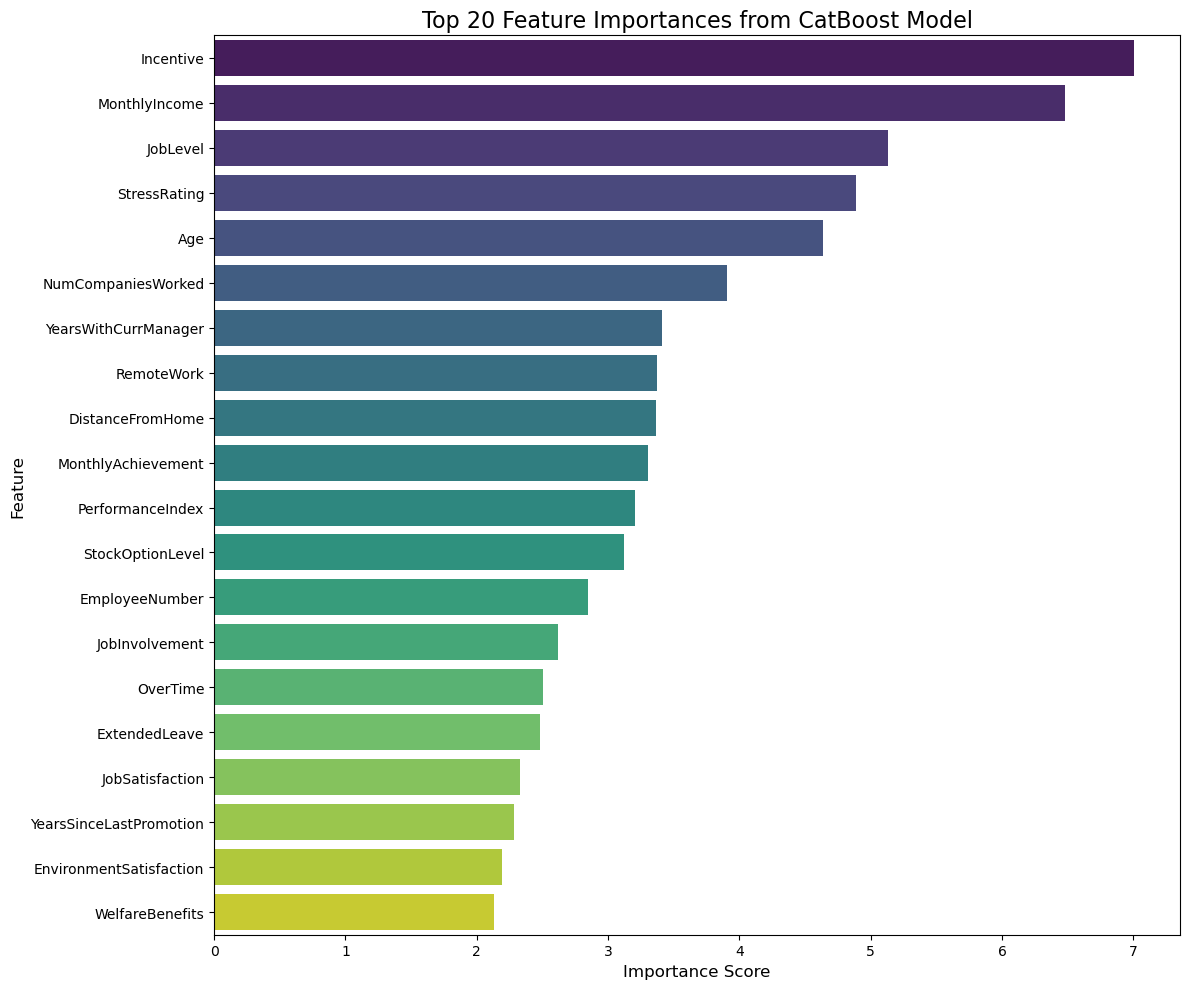

--- Top 10 Feature Importances ---
                 Feature  Importance
24             Incentive    7.004896
26         MonthlyIncome    6.480959
8               JobLevel    5.132040
27          StressRating    4.886495
0                    Age    4.639348
11    NumCompaniesWorked    3.904997
23  YearsWithCurrManager    3.412515
25            RemoteWork    3.372379
1       DistanceFromHome    3.368417
10    MonthlyAchievement    3.306363


In [12]:
# 1. 最終モデルの学習
# CatBoostが最も性能が良かったので、訓練データ全体を使って最終モデルを学習させます。
final_model = CatBoostClassifier(verbose=0, random_state=42)
final_model.fit(X_train, y_train)

# 2. 特徴量の重要度を取得
feature_importances = final_model.get_feature_importance()
features = X_train.columns

# 3. DataFrameにまとめて可視化
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 4. 上位20個の特徴量を可視化
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')
plt.title('Top 20 Feature Importances from CatBoost Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout() # グラフのレイアウトを調整
plt.show()

# 重要度の高い特徴量をテキストで表示
print("--- Top 10 Feature Importances ---")
print(importance_df.head(10))
